In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
df0 = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("CONVENIENT_global_deaths.csv")

In [3]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases
world

,Country,Cases
0,Afghanistan,156552.0
1,Albania,193075.0
2,Algeria,207970.0
3,Andorra,15819.0
4,Angola,64913.0
...,...,...
275,Vietnam,1026522.0
276,West Bank and Gaza,456632.0
277,Yemen,9918.0
278,Zambia,209983.0


In [4]:
list_country=world['Country'].unique()
list_country

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia.1', 'Australia.2', 'Australia.3', 'Australia.4',
       'Australia.5', 'Australia.6', 'Australia.7', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Canada.1', 'Canada.2',
       'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7',
       'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11', 'Canada.12',
       'Canada.13', 'Canada.14', 'Canada.15', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China.1', 'China.2', 'China.3',
       'China.4', 'China.5', 'China.6', 'China.7', 'China.8', 'China.9',
       'China.10', 'China.11', 'China.12', 'China.1

In [5]:
country_list=list(world["Country"].values) # list of all the country

In [6]:
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world

,Country,Cases
0,Afghanistan,156552.0
1,Albania,193075.0
2,Algeria,207970.0
3,Andorra,15819.0
4,Angola,64913.0
...,...,...
190,Vietnam,1026522.0
191,West Bank and Gaza,456632.0
192,Yemen,9918.0
193,Zambia,209983.0


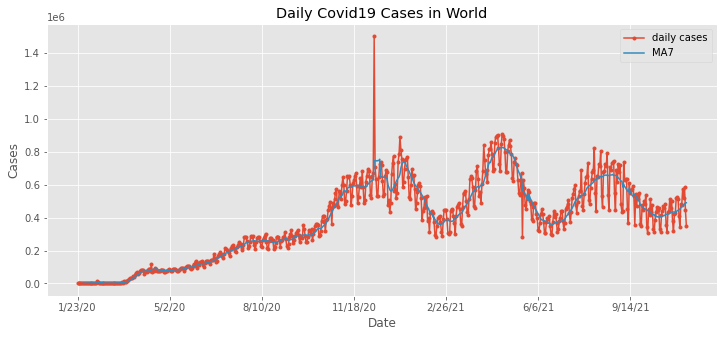

In [7]:
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=7).mean().plot(figsize=(12,5),label="MA7") # moving average for 7 days
plt.ylabel("Cases")
plt.legend()
plt.show()

In [11]:
#from fbprophet import Prophet
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [14]:
adf_test(df['Cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.938057
p-value                   0.314375
# lags used              20.000000
# observations          641.000000
critical value (1%)      -3.440593
critical value (5%)      -2.866060
critical value (10%)     -2.569177
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [15]:
auto_arima(df['Cases'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  662
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -8167.519
Date:                Mon, 21 Nov 2022   AIC                          16351.037
Time:                        11:26:34   BIC                          16386.987
Sample:                    01-23-2020   HQIC                         16364.970
                         - 11-14-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3926      0.038     10.353      0.000       0.318       0.467
ar.L2         -0.5603      0.027    -20.389      0.000      -0.614      -0.506
ar.L3         -0.3575      0.026    -13.984      0.000      -0.408      -0.307
ar.L4         -0.2626      0.024    -11.116      0.000      -0.309      -0.216
ar.L5         -0.2805      0.038     -7.468      0.000      -0.354      -0.207
ma.L1         -1.1453      0.031    -36.673      0.000      -1.207      -1.084
ma.L2          0.8312      0.023     36.177      0.000       0.786       0.876
sigma2      3.529e+09   1.32e-11   2.67e+20      0.000    3.53e+09    3.53e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            134662.05
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              33.07   Skew:                             3.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.12e+35. Standard errors may be unstable.
"""

In [16]:
len(df)

662

In [17]:
train = df.iloc[:632]
test = df.iloc[632:]

In [18]:
model = SARIMAX(train['Cases'],order=(5,1,2))
results = model.fit()
results.summary()

C:\Users\tp3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tp3\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\tp3\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tp3\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  632
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -7803.567
Date:                Mon, 21 Nov 2022   AIC                          15623.134
Time:                        11:27:06   BIC                          15658.713
Sample:                    01-23-2020   HQIC                         15636.953
                         - 10-15-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3978      0.039     10.094      0.000       0.321       0.475
ar.L2         -0.5611      0.028    -19.930      0.000      -0.616      -0.506
ar.L3         -0.3552      0.026    -13.470      0.000      -0.407      -0.304
ar.L4         -0.2618      0.025    -10.607      0.000      -0.310      -0.213
ar.L5         -0.2747      0.039     -7.000      0.000      -0.352      -0.198
ma.L1         -1.1407      0.033    -34.673      0.000      -1.205      -1.076
ma.L2          0.8273      0.024     33.988      0.000       0.780       0.875
sigma2      3.616e+09   1.38e-11   2.62e+20      0.000    3.62e+09    3.62e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            129490.34
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              35.12   Skew:                             3.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+36. Standard errors may be unstable.
"""

In [19]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = pd.DataFrame(results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions'))
test_df=pd.DataFrame(test['Cases'])
test_df.reset_index(drop=True, inplace=True)
predictions.reset_index(drop=True, inplace=True)
df_final=pd.concat([predictions, test_df],axis=1)

df_final

,Predictions,Cases
0,355761.059597,332030.0
1,332412.975086,313262.0
2,372022.369611,418180.0
3,438626.697431,440924.0
4,474005.197899,469425.0
5,470571.198160,456679.0
6,421741.797336,484560.0
7,363359.258031,356995.0
8,341191.892955,314470.0
9,373654.611154,433295.0


<AxesSubplot:>

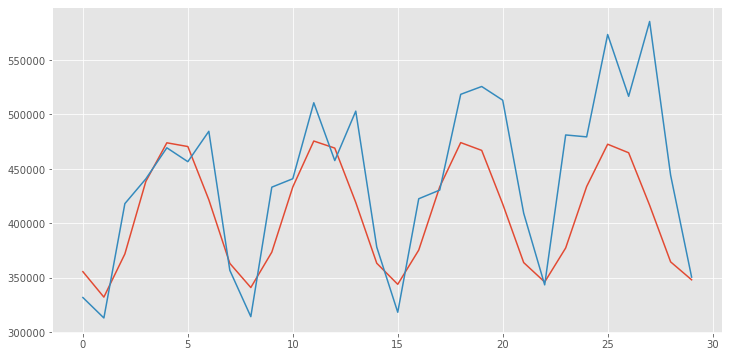

In [21]:
df_final['Predictions'].plot(figsize=(12,6))
df_final['Cases'].plot(figsize=(12,6))

In [23]:
# Plot predictions against known values

# title = 'Covid cases of the world'
# ylabel='Covid Cases'
# xlabel=''
# ax = test['Cases'].plot(legend=True,figsize=(12,6),title=title)
# predictions.plot(legend=True)
# ax.autoscale(axis='x',tight=True)
# ax.set(xlabel=xlabel, ylabel=ylabel);



In [24]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Cases'], predictions)
print(f'SARIMA(5,1,2) MSE Error: {error:11.10}')

SARIMA(5,1,2) MSE Error: 3.334968463e+09


# Prediction for India

In [25]:
df_India=pd.DataFrame(df0['India'])
df_India=df_India.dropna()
df_India.reset_index(drop=True, inplace=True)
df_India

,India
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
657,13091.0
658,12516.0
659,11850.0
660,11271.0


In [26]:
auto_arima(df_India['India'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  662
Model:               SARIMAX(5, 1, 4)   Log Likelihood               -6700.610
Date:                Mon, 21 Nov 2022   AIC                          13421.220
Time:                        11:30:56   BIC                          13466.158
Sample:                             0   HQIC                         13438.637
                                - 662                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7740      0.051     34.734      0.000       1.674       1.874
ar.L2         -1.8068      0.094    -19.271      0.000      -1.991      -1.623
ar.L3          1.2196      0.092     13.201      0.000       1.038       1.401
ar.L4         -0.7158      0.071    -10.075      0.000      -0.855      -0.577
ar.L5          0.4460      0.040     11.178      0.000       0.368       0.524
ma.L1         -2.1507      0.052    -40.987      0.000      -2.254      -2.048
ma.L2          2.4233      0.114     21.227      0.000       2.200       2.647
ma.L3         -1.4842      0.108    -13.738      0.000      -1.696      -1.272
ma.L4          0.4874      0.045     10.852      0.000       0.399       0.575
sigma2      4.724e+07    1.1e-08   4.31e+15      0.000    4.72e+07    4.72e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):             22019.28
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              16.64   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.65e+31. Standard errors may be unstable.
"""

In [27]:
train = df_India.iloc[:632]
test = df_India.iloc[632:]

In [28]:
model = SARIMAX(train['India'],order=(5,1,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  India   No. Observations:                  632
Model:               SARIMAX(5, 1, 4)   Log Likelihood               -6410.641
Date:                Mon, 21 Nov 2022   AIC                          12841.282
Time:                        11:30:59   BIC                          12885.755
Sample:                             0   HQIC                         12858.555
                                - 632                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7735      0.053     33.178      0.000       1.669       1.878
ar.L2         -1.8060      0.098    -18.402      0.000      -1.998      -1.614
ar.L3          1.2190      0.097     12.612      0.000       1.030       1.408
ar.L4         -0.7158      0.074     -9.635      0.000      -0.861      -0.570
ar.L5          0.4461      0.042     10.691      0.000       0.364       0.528
ma.L1         -2.1502      0.055    -39.134      0.000      -2.258      -2.042
ma.L2          2.4222      0.120     20.259      0.000       2.188       2.657
ma.L3         -1.4831      0.113    -13.109      0.000      -1.705      -1.261
ma.L4          0.4871      0.047     10.367      0.000       0.395       0.579
sigma2      4.942e+07    1.1e-08   4.49e+15      0.000    4.94e+07    4.94e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):             19140.08
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):              42.65   Skew:                             0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.12e+30. Standard errors may be unstable.
"""

In [29]:
start=len(train)
end=len(train)+len(test)-1
predictions = pd.DataFrame(results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions'))
test_df=pd.DataFrame(test['India'])
test_df.reset_index(drop=True, inplace=True)
predictions.reset_index(drop=True, inplace=True)
df_final=pd.concat([predictions, test_df],axis=1)

df_final

,Predictions,India
0,15166.661479,14146.0
1,13333.523894,13596.0
2,12910.242199,13058.0
3,14143.828582,14623.0
4,15051.290565,18454.0
5,14865.700005,15786.0
6,13886.716510,16326.0
7,12520.089392,15906.0
8,11538.907095,14306.0
9,11611.142872,12428.0


<AxesSubplot:>

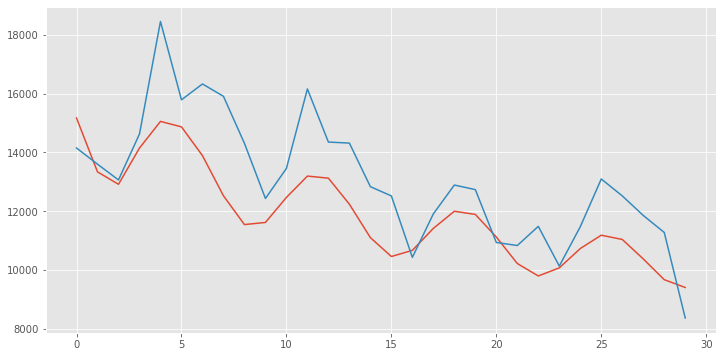

In [30]:
df_final['Predictions'].plot(figsize=(12,6))
df_final['India'].plot(figsize=(12,6))